<a href="https://colab.research.google.com/github/koheikobayashi/machine-learning/blob/main/LightGBM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gini Impurityの解説

Gini Impurity（ジニ不純度）は、決定木やランダムフォレストといった機械学習アルゴリズムで使用される不純度指標の一つです。この指標は、あるノードにおけるデータの不純度（分割の質）を測定します。具体的には、データの分散をどれだけ減らすことができたかを評価します。

インライン数式としては、$Gini(t) = 1 - \sum_{i=1}^{n} p_i^2$という形で表現されます。

より詳細な数式を用いると以下のようになります：

$$
Gini(t) = 1 - \sum_{i=1}^{n} (p_i)^2
$$

ここで、$p_i$はクラス$i$の確率（そのノードにおけるクラス$i$のサンプルの割合）です。

ジニ不純度は0から1の間の値を取り、0は完全に純粋なノード（すべてのサンプルが同じクラスに属すること）を示し、1は最大の不純度を示します。

### Gini ImpurityとLightGBM

LightGBMは、勾配ブースティングフレームワークであり、高速な実行速度で大規模なデータセットの処理を可能にします。LightGBMは、決定木を用いたブースティングを基にしており、ツリースプリッティングの際にジニ不純度を使用することがあります。

### 使用用途

ジニ不純度は主にデータの分割方法を決定する際に使用されます。決定木アルゴリズムは特定の特徴量でデータを分割する際に、分割後のノードの純度を最大化（不純度を最小化）する方向で進行します。これにより、高精度な分類が行えるようにノードが構成されます。

In [1]:
# Gini不純度を計算するPythonコード

def calculate_gini_impurity(labels):
    from collections import Counter
    # 各クラスのラベルの数をカウント
    label_counts = Counter(labels)
    total_count = len(labels)
    print(f"Label Counts: {label_counts}")

    # ジニ不純度を計算
    impurity = 1.0
    for count in label_counts.values():
        prob_of_label = count / total_count
        impurity -= prob_of_label ** 2
        print(f"Current label count: {count}, probability: {prob_of_label}, impurity: {impurity}")
    return impurity

# サンプルラベルデータ
labels = [0, 0, 1, 1, 2, 2, 2]

# Gini不純度を計算し、結果を出力
impurity = calculate_gini_impurity(labels)
print(f"Calculated Gini Impurity: {impurity}")

# このコードは与えられたラベルに基づいてジニ不純度を計算します。
# 'labels'はデータポイントが属するクラスを示すリストです。
# 結果のジニ不純度は、データセットの純度を評価するために使用されます。

Label Counts: Counter({2: 3, 0: 2, 1: 2})
Current label count: 2, probability: 0.2857142857142857, impurity: 0.9183673469387755
Current label count: 2, probability: 0.2857142857142857, impurity: 0.8367346938775511
Current label count: 3, probability: 0.42857142857142855, impurity: 0.653061224489796
Calculated Gini Impurity: 0.653061224489796


### エントロピーとは

エントロピーは情報理論および統計学で使用される概念で、主に不確実性や情報の量を測定するために用いられます。情報理論では、エントロピーはデータのばらつきの尺度としても理解されています。

エントロピーは数学的には次のように定義されます。ある確率分布 $P = \{p_1, p_2, \ldots, p_n\}$ が与えられたとき、エントロピー $H(P)$ は次の式で表されます：

- インライン数式: $H(P) = -\sum_{i=1}^n p_i \log_2 p_i$

- ブロック数式:
  $$
  H(P) = -\sum_{i=1}^n p_i \log_2 p_i
  $$

ここで、$p_i$ は事象 $i$ の発生確率であり、エントロピー $H(P)$ はその分布が持つ平均の情報量を意味します。

### LightGBMとの関係性

LightGBMは勾配ブースティングの手法の一つで、エントロピーは情報利得（information gain）の計算に使われます。情報利得とは、ある特徴量によってデータがどれほど分けられるか、またその分けたことでどれほど不確実性が減少するかを定量的に評価する指標です。具体的には、LightGBMや他の決定木アルゴリズムは、エントロピーを用いてどのようにデータを分割するかの基準を設定します。

### 使用用途

エントロピーは以下のような使い方でよく用いられます：
- 情報理論におけるデータ圧縮
- 機械学習におけるモデル評価
- 自然言語処理やクラスタリングにおけるデータの多様性の測定

これにより、エントロピーは様々な分野で重要な役割を担っています。

In [2]:
# 確率分布を持つデータが与えられているとして、
# そのエントロピーの計算をPythonで行います。

import numpy as np

# 例: 確率分布
probability_distribution = [0.2, 0.5, 0.3]

# エントロピーを計算する関数
# エントロピーH(P) = -sum(p_i * log2(p_i)) を計算

def calculate_entropy(prob_dist):
    # エントロピー初期化
    entropy = 0

    # 各確率について計算
    for p in prob_dist:
        if p > 0:  # p が0の時のログは未定義のため除外
            entropy -= p * np.log2(p)
    return entropy

# エントロピーの計算
entropy_value = calculate_entropy(probability_distribution)

# 計算した結果を出力
print("確率分布:", probability_distribution)
print("エントロピー:", entropy_value)

# このコードは確率分布が与えられた際、そのエントロピーを計算します。
# 各確率値に対して -p_i * log2(p_i) を計算し、その結果を合計することでエントロピーを求めます。
# 確率値が0の場合は計算しません。

確率分布: [0.2, 0.5, 0.3]
エントロピー: 1.4854752972273344


MSE（Mean Squared Error）は、予測モデルの精度を評価するために用いられる指標です。MSEは、予測値と実際の値の差を二乗した後に平均を取ることで算出されます。これにより、モデルの誤差の大きさを平均的に捉えることができます。数式としては以下で表されます。

インライン数式: $\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$

ブロック数式:

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

ここで、$y_i$は実際の値、$\hat{y_i}$は予測値、$n$はデータの数を表します。

MSEは特に回帰分析において、モデルの性能を評価する際に頻繁に使用されます。値が小さいほど、モデルが正確であることを意味します。

LightGBMにおいても、MSEはロス関数として利用されることがあります。LightGBMは勾配ブースティングを用いるライブラリで、誤差を最小化するようにモデルを訓練します。その際にMSEを誤差の尺度として使用することで、モデルの予測性能を向上させることができます。

In [3]:
# MSEを計算するためのPythonコード
import numpy as np

# 実際の値と予測値のサンプルデータを用意
actual_values = np.array([3, -0.5, 2, 7])
predicted_values = np.array([2.5, 0.0, 2, 8])

# MSEを計算
def calculate_mse(actual, predicted):
    # 予測値と実際の値の差を計算
    differences = actual - predicted
    print(f'Differences: {differences}')  # 差を表示

    # 差の二乗を計算
    squared_differences = differences ** 2
    print(f'Squared Differences: {squared_differences}')  # 差の二乗を表示

    # 二乗誤差の平均を計算
    mse = np.mean(squared_differences)
    print(f'MSE: {mse}') # MSEを表示
    return mse

# MSE関数を使用して結果を計算
result = calculate_mse(actual_values, predicted_values)


Differences: [ 0.5 -0.5  0.  -1. ]
Squared Differences: [0.25 0.25 0.   1.  ]
MSE: 0.375


情報利得 (Information Gain) は、決定木アルゴリズムの分岐作成において特に重要な概念です。情報利得は、一つの属性でデータを分割した結果、どれだけの不純度が減少したかを測定する尺度です。具体的には、あるノードを分割することによって得られる情報の有用性を評価します。

インライン数式で表すと、情報利得 $IG(D, A)$ は次のように計算されます：

$$IG(D, A) = H(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} \cdot H(D_v)$$

ここで、$H(D)$ はデータセット $D$ のエントロピーであり、$D_v$ は属性 $A$ に基づく値 $v$ で分割されたデータセットの部分集合を表しています。

ブロック数式での表現：

$$
IG(D, A) = H(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} \cdot H(D_v)
$$

LightGBMにおいては、この情報利得が各特徴の分岐点を選択するための主要な基準として使用され、モデル精度向上のために重要です。

情報利得の主な使用用途は、デシジョンツリーやツリー型モデル（例えば、LightGBM、ランダムフォレストなど）における分割基準の評価として用いられます。

In [4]:
# 情報利得を計算するPythonコード

import numpy as np

# エントロピーを計算する関数
def entropy(elements):
    # 要素の確率を計算
    probabilities = [np.mean(elements == cls) for cls in set(elements)]
    # エントロピーを計算
    entropy_value = -sum(p * np.log2(p) for p in probabilities if p > 0)
    return entropy_value

# 情報利得を計算する関数
def information_gain(D, D_v):
    # 全体のエントロピーを計算
    H_D = entropy(D)
    # 条件付きエントロピーを計算
    weighted_entropy = sum((len(subset) / len(D)) * entropy(subset) for subset in D_v)
    # 情報利得を計算
    IG = H_D - weighted_entropy
    return IG

# データセットの例
data = np.array(['A', 'A', 'A', 'B', 'B', 'C', 'C', 'C', 'C', 'C'])

# 特定条件で分割されたサブセットの例
subset_1 = np.array(['A', 'A', 'A', 'B'])
subset_2 = np.array(['B', 'C', 'C', 'C', 'C', 'C'])
subsets = [subset_1, subset_2]

# エントロピーを出力して確認
entropy_data = entropy(data)
print("全データセットのエントロピー: ", entropy_data)

# 各サブセットのエントロピーを出力して確認
entropy_subset1 = entropy(subset_1)
entropy_subset2 = entropy(subset_2)
print("サブセット1のエントロピー: ", entropy_subset1)
print("サブセット2のエントロピー: ", entropy_subset2)

# 情報利得を計算して出力
ig_value = information_gain(data, subsets)
print("情報利得 (Information Gain): ", ig_value)


全データセットのエントロピー:  1.4854752972273344
サブセット1のエントロピー:  0.8112781244591328
サブセット2のエントロピー:  0.6500224216483541
情報利得 (Information Gain):  0.7709505944546688


勾配（Gradient）は、関数の変数に対する微分であり、数値的な斜面を示します。特に、機械学習においては、損失関数を最小化するためのパラメータの更新方向を示します。勾配は、関数 $f(x)$ の各変数 $x_i$ についての偏微分を取ったベクトルとして表されます。インライン数式では、勾配は $\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right)$ と表されます。

ブロック数式では次のように表します:
$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right)
$$

LightGBMでの勾配は、ブースティングプロセスを通してモデルを最適化するための中心的な役割を果たします。具体的には、各弱学習器（つまり木構造）が予測誤差の勾配に基づいて修正を行います。

使い方としては、すべてのサンプルの損失の勾配を計算し、それに基づいて各木を構築します。そして、この木を用いて勾配を補正し、最終的なアンサンブルモデルを訓練します。

In [5]:
# 勾配を計算するためのPythonコード
import numpy as np

# シンプルな二次関数 f(x) = x^2 を考える
# これを微分したい

def f(x):
    return x ** 2

# 勾配（微分）を計算する関数
# f'(x) = 2x という理論を用います。
def gradient(x):
    return 2 * x

# 例として x = 3 のときの勾配を計算
x_value = 3
gradient_value = gradient(x_value)

# 計算結果を出力
print(f'関数 f(x) = x^2 における x = {x_value} での勾配: ', gradient_value)

# このコードは LightGBM における基礎勾配計算の理解を目的とします。
# 実際の使用では、データセット全体の損失関数に基づいた勾配の計算が行われます。

# 変数の中身を表示
print(f"x_value: {x_value}")
print(f"gradient_value: {gradient_value}")

関数 f(x) = x^2 における x = 3 での勾配:  6
x_value: 3
gradient_value: 6


ヘッシアン(Hessian)は、ある関数の全ての2次偏導関数を含む行列です。
これは、関数の形状や歪みを解析するのに役立ちます。
特に、二次形式を用いる際に非常に重要な役割を果たします。
インライン数式で書くと、ヘッシアン行列\(H\)は次のように定義されます: $H = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\ \vdots & \ddots & \vdots \\ \frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2} \end{bmatrix}$。ブロック数式で表すと、$$H = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\ \vdots & \ddots & \vdots \\ \frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2} \end{bmatrix}$$。

LightGBMにおけるヘッシアンは、決定木のブースティングプロセスで使用される重要な概念で、二乗ロスの最小化を通じて勾配に基づく最適化を行います。
具体的には、LightGBMは学習時に、各決定木の葉を分割するためにヘッシアンを用いて、より正確な分割基準を決定します。
予測精度を向上させるために、勾配だけでなくヘッシアンも考慮することで、より高速かつ効率的な学習が可能になります。

In [6]:
# 必要なライブラリをインポートします
import numpy as np
from sympy import Matrix, symbols, diff

# 変数の定義
a, b = symbols('a b')

# 関数fを定義します
def f(a, b):
    return a**2 + b**2 + a*b

# ヘッシアン行列を計算するための空の行列を作成します
H = Matrix([[diff(f(a, b), a, a), diff(f(a, b), a, b)],
             [diff(f(a, b), b, a), diff(f(a, b), b, b)]])

# ヘッシアン行列を出力します
print("Hessian Matrix:")
print(H)

# 上の結果は関数f(a,b) = a^2 + b^2 + abのヘッシアン行列です
# fの2次偏導関数を計算しているため、ヘッシアンは以下のようになります:
# [[2, 1],
#  [1, 2]]


Hessian Matrix:
Matrix([[2, 1], [1, 2]])


Leaf-wise Growthは、LightGBMにおける決定木の成長方法の一つで、Gradient Boosting Decision Tree (GBDT)を効率的に構築するために用いられます。通常のLevel-wise Growthでは、ツリーの全てのレベルで一斉にノードを展開しますが、Leaf-wise Growthでは、まず最も情報ゲインが高いリーフを選んで育てることで、ツリーの深さを柔軟に調整します。これは特に深いツリーを好むLightGBMにおいて、より高い予測精度を得るための重要な特徴です。Leaf-wise Growthの基本的な考え方は、情報利得(Information Gain)を最大化することにあります。情報利得は、新しい分割によって得られる情報の増加量を定量化するもので、以下の式で表されます。

インライン数式: $Gain =
rac{1}{2} \left(
rac{\sum_{i \in left} grad_i}{H_{left} + \lambda} +
rac{\sum_{i \in right} grad_i}{H_{right} + \lambda} -
rac{\sum_{i \in all} grad_i}{H_{all} + \lambda} \right)$

ブロック数式:
$$
Gain = \frac{1}{2} \left( \frac{\sum_{i \in left} grad_i}{H_{left} + \lambda} + \frac{\sum_{i \in right} grad_i}{H_{right} + \lambda} - \frac{\sum_{i \in all} grad_i}{H_{all} + \lambda} \right)
$$

ここで、$grad_i$は各データポイント$i$の勾配であり、$H_{left}$、$H_{right}$、および$H_{all}$はそれぞれ左、右、全体のヒスジアン行列の値です。$\lambda$は正則化パラメータを指します。この分割基準に基づき、情報利得を最大化する方向にリーフが成長します。Leaf-wise Growthの利点は、より少ない計算量で高い予測精度を達成することができ、特に大規模データセットでその威力を発揮します。

In [7]:
# Leaf-wise Growthの基本的な考え方を模したPythonコードの例
import numpy as np

# グラディエントとヒスジアンのダミーデータ
gradient = np.array([0.1, -0.2, 0.3, -0.4, 0.5])
hessian = np.array([0.9, 0.8, 0.7, 0.6, 0.5])

# 正則化パラメータ
lambda_ = 1.0

# インデックスで分割を考える（例えば、2を境にする）
left_indices = np.array([0, 1])
right_indices = np.array([2, 3, 4])

# 各種計算を行う
sum_grad_left = np.sum(gradient[left_indices])
sum_grad_right = np.sum(gradient[right_indices])
sum_grad_all = np.sum(gradient)

sum_hess_left = np.sum(hessian[left_indices])
sum_hess_right = np.sum(hessian[right_indices])
sum_hess_all = np.sum(hessian)

# 情報利得を計算する
gain = 0.5 * (
    (sum_grad_left ** 2) / (sum_hess_left + lambda_) +
    (sum_grad_right ** 2) / (sum_hess_right + lambda_) -
    (sum_grad_all ** 2) / (sum_hess_all + lambda_)
)

# 結果を出力
print("Sum of gradients (left):", sum_grad_left)
print("Sum of gradients (right):", sum_grad_right)
print("Sum of gradients (all):", sum_grad_all)
print("Sum of hessians (left):", sum_hess_left)
print("Sum of hessians (right):", sum_hess_right)
print("Sum of hessians (all):", sum_hess_all)
print("Calculated Information Gain:", gain)

# このコードは、仮想的な分割に基づいて情報利得を計算することを目的としています。
# LightGBMのLeaf-wise Growthにおける分割利得を模倣した基本的な実装の例です。

Sum of gradients (left): -0.1
Sum of gradients (right): 0.39999999999999997
Sum of gradients (all): 0.29999999999999993
Sum of hessians (left): 1.7000000000000002
Sum of hessians (right): 1.7999999999999998
Sum of hessians (all): 3.5000000000000004
Calculated Information Gain: 0.020423280423280427


### Histogram-based Splitting

Histogram-based Splittingは、決定木の構築において特徴量の最適な分割点を効率的に見つけ出すための手法です。通常、決定木は各特徴量について全ての可能な分割点をチェックしますが、これは計算コストが高いため、LightGBMではヒストグラムを使用してこのプロセスを高速化しています。

#### 理論と数式
データを複数のビンに分割し、それぞれのビンに含まれるデータの情報を集計します。これは次のような数式でヒストグラムを表現できます。

- 各ビン \( i \) に対して、ビンの境界を \( b_i \) として、
  $$ H(i) = \sum_{x_j \in b_i} g(x_j) $$
  ここで、\( g(x_j) \) はデータポイント \( x_j \) に対応するグラデーションです。

- 最適分割は、すべてのビンについて二つの連続するビンの差を計算し、最も大きな差が生じた箇所を探すことで得られます。

#### LightGBMとの関係性
LightGBMは、このHistogram-based Splittingを利用することで、非常に高速に決定木の分割点を決定します。これにより、大規模なデータセットに対しても迅速に学習を行うことができます。

#### 使用用途
- 大規模なデータセットを高速に処理したい場合に有効です。
- 基本的な特徴として、計算資源が少ない環境でも高精度なモデルを構築することができます。
- GBDT（Gradient Boosting Decision Trees）モデルの構築に活用されます。

Histogram-based Splittingは、特に大規模なデータセットや高次元のデータセットにおいて、計算リソースを節約しつつモデルの精度を維持するために重要な技術です。

In [8]:
# PythonでのHistogram-based Splittingの実装例

import numpy as np

# 例としてのデータセットを生成する
np.random.seed(42)
feature = np.random.uniform(1, 100, 100)  # 1から100の範囲の連続値のデータ

# ヒストグラムのビンの数を設定する
num_bins = 10

# ヒストグラムを作成して、各ビンの境界やビンごとのデータ数を取得する
hist, bin_edges = np.histogram(feature, bins=num_bins)

# ヒストグラム情報を出力
print('Histogram:', hist)
print('Bin edges:', bin_edges)

# ビンごとの誤差の集計、ここではランダムに設定（実際には誤差またはグラデーションを計算）
grad = np.random.uniform(1, 10, num_bins)  # 各ビンに対するグラデーションの例

# 最適ビンの探索を行う（ここで連続するビン間の差異を利用）
best_split = None
max_gain = -np.inf

# リーフのグラデーションの合計を計算
total_grad = np.sum(grad)

# ビン間の情報利得を計算
for i in range(1, num_bins):
    left_grad = np.sum(grad[:i])  # 左のビンの合計グラデーション
    right_grad = total_grad - left_grad  # 右のビンの合計グラデーション
    gain = left_grad * (total_grad - left_grad)  # シンプルな利得の計算（実際の利得関数はもっと複雑）
    if gain > max_gain:
        max_gain = gain
        best_split = i

print('Best split bin index:', best_split)
print('Max gain:', max_gain)

# ベストな分割ポイントを求める
best_split_point = (bin_edges[best_split - 1] + bin_edges[best_split]) / 2
print('Best split point:', best_split_point)

Histogram: [13 15  6 12  7  8  9 12  8 10]
Bin edges: [ 1.5466896  11.26220131 20.97771302 30.69322473 40.40873645 50.12424816
 59.83975987 69.55527158 79.2707833  88.98629501 98.70180672]
Best split bin index: 5
Max gain: 544.701000805894
Best split point: 45.26649230293319


GOSS (Gradient-based One-Side Sampling) は、LightGBM において提案されたサンプリング手法であり、大規模なデータセットでの勾配ブースティング決定木 (GBDT) の学習を効率化するために用いられます。従来の GBDT は、データの全サンプルを使用して木を構築しますが、GOSS は勾配の大きさに基づいてサンプリングを行うことで学習速度を向上させます。具体的には、勾配が大きいサンプルは外れ値を示しやすいため、そのまま抽出し、勾配が小さいサンプルは一定の割合でランダムに抽出します。数式で表すと、あるサンプル $i$ に対する勾配を $g_i$ とすると、大きい勾配に対するサンプルに重みを 1、ランダムに抽出されたサンプルに重みを $$t \cdot
rac{1 - a}{b}$$ としてペナルティを調整します。

In [9]:
# Pythonのコード例
import numpy as np

# 大きい勾配を持つサンプルを選択する割合
large_gradient_fraction = 0.2
# 小さい勾配を持つサンプルを抽出する割合
small_random_fraction = 0.5

# サンプルの総数
n_samples = 1000

# サンプルに対する人工の勾配データを生成
np.random.seed(42)
gradients = np.random.rand(n_samples)

# 勾配の大きさでサンプルをソート
sorted_indices = np.argsort(-gradients)
gradients_sorted = gradients[sorted_indices]

# 大勾配のサンプル
n_large = int(n_samples * large_gradient_fraction)
large_gradients = gradients_sorted[:n_large]

# 小さい勾配はランダムに選択
n_small = int(n_samples * small_random_fraction)
random_indices = np.random.choice(range(n_large, n_samples), n_small, replace=False)
small_gradients = gradients_sorted[random_indices]

# サンプルの重みを定義
t = gradients.mean()
large_weights = np.ones(n_large)
small_weights = t * (1 - large_gradient_fraction) / small_random_fraction

print('Large Gradient Samples:', large_gradients)
print('Small Gradient Samples:', small_gradients)
print('Weight for small gradients:', small_weights)

Large Gradient Samples: [0.99971767 0.99687425 0.99663684 0.9929648  0.99050514 0.99005385
 0.98996023 0.98727613 0.98688694 0.98663958 0.98651525 0.98621074
 0.98600106 0.98565045 0.9848412  0.98440218 0.98237862 0.98003258
 0.97585208 0.97439481 0.97301055 0.97178208 0.9699144  0.96990985
 0.96987883 0.96958463 0.96947043 0.96930254 0.96665482 0.96563203
 0.96502691 0.96361998 0.96322254 0.96264841 0.96244729 0.96217255
 0.96119056 0.96107032 0.95486528 0.95405103 0.95392858 0.95071431
 0.95060715 0.95041148 0.95023735 0.95006197 0.94979991 0.94952062
 0.94888554 0.94845331 0.94728334 0.94724858 0.94611546 0.94476573
 0.9429097  0.94146481 0.94045858 0.94023024 0.93983212 0.93949894
 0.93834046 0.93682974 0.93672999 0.93615477 0.93436701 0.93272848
 0.93211828 0.93075733 0.92969765 0.92952914 0.92937599 0.92831856
 0.92658763 0.92556851 0.92469362 0.92249938 0.92187424 0.9208724
 0.92084188 0.91985562 0.91731358 0.91486439 0.9148459  0.91441195
 0.91429881 0.91324055 0.91092718 0.909

## Exclusive Feature Bundling (EFB)について

Exclusive Feature Bundling (EFB) は、LightGBMにおいて特徴量の数を削減するためのテクニックです。多くの機械学習問題では高次元のデータを扱うことが一般的です。EFBを使用することで、相互排他の特徴量を同じグループ（バンドル）にまとめることができます。

### 理論
EFBでは、相互排他的な特徴量を一つの特徴量にまとめます。相互排他的とは、同一データ内で同時に1つ以上の特徴がゼロ以外になることがないことを指します。

例えば、特徴Aと特徴Bが同時に非ゼロになることがない場合、これら2つの特徴はバンドリングされ、
新しい一つの特徴となります。

具体的に数式で表すと、特徴量ベクトル $X = [x_1, x_2, ..., x_n]$ の中から相互排他的なサブセットを探し、それらの和（または他の直線変換）として表現できます。

$$
X_{EFB} = [b_1, b_2, ..., b_m], \
b_i = f(x_{i1}, x_{i2}, ..., x_{ik})
$$

$X_{EFB}$ は新しい特徴ベクトルであり、$b_i$ はバンドルされた特徴です。

### LightGBMとの関係性
LightGBMは、高速で高性能な決定木ベースの学習アルゴリズムを提供します。その一環として、EFBを利用することで、効率的な学習とメモリ使用量の削減を実現します。

### 使用用途
EFBは、特にディスクリートかつまばらなデータセットにおいて有効です。これにより、以下のような効果があります。
- 特徴量数の減少
- メモリ消費の削減
- 計算速度の向上

In [10]:
# Exclusive Feature Bundling (EFB) の理論を理解するためのPythonコード例です。
# このコードは、EFBの基本的なアイデアをシミュレートしたものであり、実行中のLightGBM内での実装ではありません。

import numpy as np

# サンプルデータとして相互排他的な特徴量を作成
# 二つの特徴量ベクトル（AとB）があるとします。
features_A = np.array([0, 1, 0, 0, 0])
features_B = np.array([0, 0, 1, 0, 0])

# EFBを用いて、AとBを一つのベクトルにバンドルします。
# 条件として、AとBは相互に排他的です（同時に非ゼロにならない）。
bundled_features = features_A + features_B

# 結果を表示
print('Original Features A:', features_A)
print('Original Features B:', features_B)
print('Bundled Features:', bundled_features)

# この例では、bundled_featuresはfeatures_Aとfeatures_Bの情報を持っています。
# しかし、それは単一の特徴となって、サイズが削減されたことを示します。

# Output
# Original Features A: [0 1 0 0 0]
# Original Features B: [0 0 1 0 0]
# Bundled Features:    [0 1 1 0 0]

# EFBはこのような単純な足し算だけでなく、必要に応じてもっと複雑な操作をすることもできます。

Original Features A: [0 1 0 0 0]
Original Features B: [0 0 1 0 0]
Bundled Features: [0 1 1 0 0]


Early Stopping は機械学習アルゴリズムの一種で、主にモデルの過学習を防ぐために使用されます。過学習とは、モデルが訓練データに対してあまりにもよく適応しすぎてしまうことであり、これにより他の新しいデータに対しての性能が低下する恐れがあります。        

Early Stoppingは一定の基準（通常は検証データにおける誤差や精度の変動）を満たすことができなくなった場合に訓練を中止します。例えば、一定エポック数にわたってベストな検証誤差が更新されない場合に学習を停止することができます。        

LightGBMにおいては、多くの場合、このパラメータは `early_stopping_rounds` という名称で設定されます。たとえば、検証データに対して誤差が一定のラウンド数更新されなければ学習を停止します。        

理論的には、早期停止のアルゴリズムは次のように概念化することができます：        

- 現在の検証誤差 $E_{val}$ が最良の誤差 $E_{best}$ より小さい場合、$E_{best}$ を更新する。        

- エポック $i$ に対して誤差が最良の状態からの許容幅 $\Delta$ 以上に改善されない場合停止する。        

ところで、モデルパラメータが学習するごとに更新されるとして、誤差は次のように定義されると考えられます：         $$ E(	heta) = \frac{1}{n} \sum_{i=1}^{n} L(y_i, f(x_i, 	heta)) $$         ここで、$L$ は損失関数、$y_i$ は正解ラベル、$f(x_i, 	heta)$ は予測関数です。

In [ ]:
# 必要なライブラリをインポートします
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# データをロードして訓練とテストセットに分割します
boston = load_boston()
X_train, X_val, y_train, y_val = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

# LightGBM用のデータセットを作成します
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val, reference=d_train)

# パラメータを設定します
params = {
    'objective': 'regression',
    'metric': 'l2',
    'verbosity': -1
}

# モデルの訓練を行い、早期停止を使用します
print('Train LightGBM model with early stopping')
evals_result = {}
model = lgb.train(params,
                  d_train,
                  valid_sets=[d_train, d_val],
                  valid_names=['train', 'valid'],
                  evals_result=evals_result,
                  num_boost_round=100,
                  early_stopping_rounds=10)

# 最良のラウンド数を出力します
print('Best iteration:', model.best_iteration)

# 検証データに対する予測を行います
y_pred = model.predict(X_val, num_iteration=model.best_iteration)

# 予測結果と実際のラベルを比較して誤差を出力します
mse = mean_squared_error(y_val, y_pred)
print('Validation MSE:', mse)

# 各ラウンドでの評価結果を出力します
print('Evaluation results:', evals_result)

### Learning Rate Decay

Learning Rate Decay（学習率減衰）は、機械学習特に深層学習において、学習の進行に従って学習率を徐々に減少させる手法です。学習率は、モデルのパラメータを更新する際の一歩の大きさを決定する重要なハイパーパラメータです。初期の学習では高い学習率を設定して高速に学習を進め、後半では学習率を減少させて微調整するというアプローチが効果的であることが知られています。

LightGBMにおいても、Learning Rate Decayを用いることで、学習の安定性を向上させ、最適なモデルを得ることが可能です。モデルの学習が進むにつれて、高い学習率では損失が安定しにくくなるため、Learning Rate Decayを適用してパラメータの最適化を図ります。

#### 数式
Learning Rate Decayの典型的な形は次のように定義されます：

1. **指数的減衰:**
   学習率 \( \eta_t \) はエポック数 \( t \) に応じて
   $\( \eta_t = \eta_0 \cdot \exp(-kt) \)$
   $$\eta_t = \eta_0 \cdot \exp(-kt)$$
   ここで、\( \eta_0 \) は初期学習率で、\( k \) は減衰率を調整するハイパーパラメータです。

2. **段階的減衰:**
   $\( \eta_t = \eta_0 \cdot \text{decay\_rate}^{\lfloor t / \text{decay\_step} \rfloor} \)$
   $$\eta_t = \eta_0 \cdot \text{decay\_rate}^{\lfloor t / \text{decay\_step} \rfloor}$$
   ここで、\( 	ext{decay\_rate} \) は何度も学習率を減少させる割合、\( 	ext{decay\_step} \) は何エポックごとに減少させるかを決定します。

#### 使用用途
Learning Rate Decayは、特に深層学習のトレーニングにおいて頻用されます。これは、初期段階で迅速に最適化をすすめ、大域的最適値へ近づく目的と、後半での微調整によって局所的な最適化を達成するためです。LightGBMでは、こうした手法により勾配ブースティングの性能を高めることを狙います。この機能は、LGBMの`学习率`パラメータにおけるdecayオプションとして実装されています。

初期学習率: 0.1
指数的減衰の最終学習率: 5.017468205617529e-06
段階的減衰の最終学習率: 0.0001953125


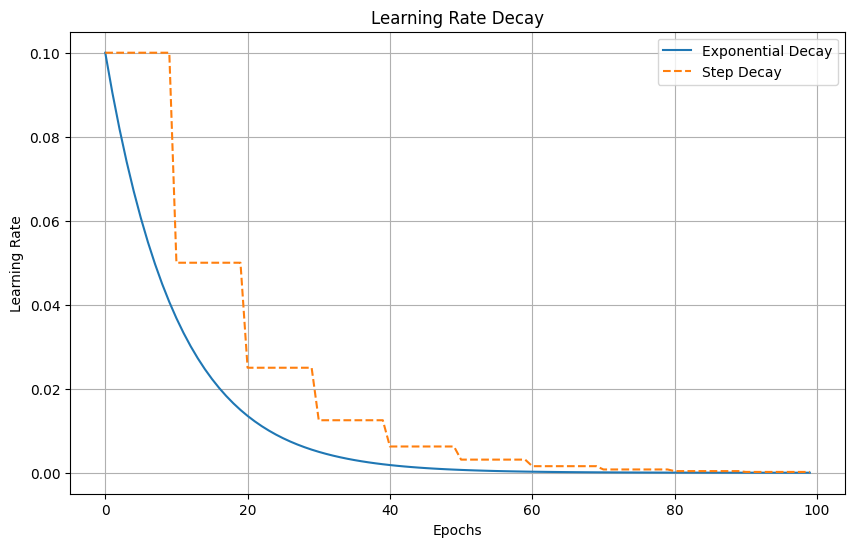

In [12]:
# Learning Rate DecayをPythonでシミュレーション

import numpy as np
import matplotlib.pyplot as plt

# 初期学習率
eta_0 = 0.1

# エポック数（100とする）
epochs = np.arange(0, 100)

# 減衰率（指数的減衰をシミュレーション）
k = 0.1

# Exponential Decay (指数的減衰)
learning_rate_exponential = eta_0 * np.exp(-k * epochs)

# Step Decay (段階的減衰) - decay_rate = 0.5, decay_step = 10
decay_rate = 0.5
decay_step = 10
learning_rate_step = eta_0 * (decay_rate ** (epochs // decay_step))

# 学習率の減衰をプロットする
def plot_learning_rate_decay(epochs, learning_rate_exponential, learning_rate_step):
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, learning_rate_exponential, label='Exponential Decay')
    plt.plot(epochs, learning_rate_step, label='Step Decay', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate Decay')
    plt.legend()
    plt.grid(True)
    plt.show()

# 学習率の変化を確認
print('初期学習率:', eta_0)
print('指数的減衰の最終学習率:', learning_rate_exponential[-1])
print('段階的減衰の最終学習率:', learning_rate_step[-1])

# プロット
plot_learning_rate_decay(epochs, learning_rate_exponential, learning_rate_step)

# 出力は各エポックにおける学習率の変化を示すものであり、
# 学習率が徐々に低下していく様子を視覚的に確認できます。

### L1正則化とL2正則化の理論

正則化は、モデルの過学習を防ぐためによく使用されるテクニックです。L1正則化（Lasso）は重みの絶対値の合計にペナルティを課す手法で、以下のように表されます。

インライン数式: $J(w) = 	ext{Loss} + \lambda \sum |w_i|$

ブロック数式:
$$J(w) = 	ext{Loss} + \lambda \sum |w_i|$$

L2正則化（Ridge）は重みの二乗の合計にペナルティを課し、以下のように表されます。

インライン数式: $J(w) = 	ext{Loss} + \frac{\lambda}{2} \sum w_i^2$

ブロック数式:
$$J(w) = 	ext{Loss} + \frac{\lambda}{2} \sum w_i^2$$

ここで、$\text{Loss}$は損失関数、$w$はモデルの重み、$\lambda$は正則化の強度を決定するハイパーパラメータです。

### L1/L2正則化とLightGBMの関係性

LightGBMは勾配ブースティング機械学習フレームワークで、過学習を防ぐためにL1正則化(L1)およびL2正則化(L2)のパラメータがサポートされています。これらは目的関数に追加され、モデルの複雑さを制御します。通常、L2正則化（`lambda_l2`）はデフォルト設定で使用されており、L1正則化 (`lambda_l1`) も可変パラメータとして設定できます。

### 使用用途

L1正則化は主に特徴選択に有用であり、重要でない特徴の重みをゼロにする傾向があります。L2正則化は重みの大きさを抑制し、過学習を防ぐためにモデルの複雑さにペナルティを与えるために使われます。L1/L2正則化の適切な組み合わせを選択することにより、モデルの汎化性能を向上させることができます。

In [13]:
# 必要なライブラリをインポートします
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, Ridge
import numpy as np

# ダミーデータの生成
X, y = make_regression(n_samples=100, n_features=5, noise=0.1)

# L1正則化（Lasso回帰）の適用
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Lassoの係数を出力
print("Lasso coefficients:", lasso.coef_)

# L2正則化（Ridge回帰）の適用
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

# Ridgeの係数を出力
print("Ridge coefficients:", ridge.coef_)

# コメント：
# ここでは、LassoとRidgeのそれぞれの回帰係数を比較することができます。
# Lassoは多くの場合、いくつかの係数をゼロに設定し特徴選択を行うのに対し、
# Ridgeは全ての特徴を利用し、重みの絶対値を抑制します。

# alphaは正則化の強さを表します。
# alphaの値が大きいほど、ペナルティが大きくなります。

Lasso coefficients: [53.1265124  63.40707897 44.84646035 55.85275409 62.68071355]
Ridge coefficients: [53.19044705 63.44388445 44.91684846 55.8889871  62.73511042]


### SHAP値について

SHAP（SHapley Additive exPlanations）値は、機械学習モデルの各予測に対する特徴量の寄与を定量化するための手法です。ゲーム理論に由来し、特に協力ゲームにおける報酬分配問題から派生しました。Shapley値は、プレイヤー（ここでは特徴量）が協力して得られる総報酬をどのように分配するかを決定するもので、以下の特性を満たします：
- **効率性**：すべての特徴量の寄与の合計が、実際の予測出力に等しい。
- **対称性**：もし二つの特徴量が同じ寄与を持つ場合、彼らのShapley値も等しい。
- **無関係性**：寄与がない特徴量のShapley値はゼロ。
- **加法性**：複数の予測モデルのShapley値は合計できます。

SHAP値の計算式は以下のようになっています。特徴量の集合を\( N \)、特定の特徴量を\( i \)とし、\( S \)を\( i \)を含まない特徴量の部分集合とした場合、Shapley値\( \phi \)は次のように定義されます。

$$
\phi_i(x) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N|-|S|-1)!}{|N|!} [v(S \cup \{i\}) - v(S)]
$$

ここで、\( v(S) \)は特徴量の集合\( S \)が得る報酬、もしくはモデルの予測値です。

### LightGBMとの関係性

LightGBMは勾配ブースティングを利用した決定木ベースの学習アルゴリズムです。特徴量重要度の評価において、SHAP値は個々の特徴量の影響度を明示的に提供するため、LightGBMモデルの解釈性を向上させます。これにより、各特徴が予測にどれだけ寄与しているかを可視化できます。

### 使用用途

SHAP値は、以下のような使用用途があります：
- **モデルの解釈**：予測モデルにおける各特徴量の影響を理解する。
- **特徴量選択**：特に重要な特徴量を特定し、モデルの性能を改善させる。
- **異常検知**：予期しないSHAP値を持つデータポイントを異常として検出する。


In [ ]:
# SHAP値を計算し、LightGBMモデルの解釈を行うPythonコード

# 必要なライブラリをインポート
import numpy as np
import lightgbm as lgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# データセットをロード
iris = load_iris()
X, y = iris.data, iris.target

# 訓練用とテスト用にデータを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBMモデルを訓練
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# SHAP値の計算
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# SHAP値を可視化
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names)

# 各特徴量のSHAP値を出力
print("SHAP値：")
for i, feature_name in enumerate(iris.feature_names):
    print(f"{feature_name}: {shap_values[:, i].values}")

# 'explainer'オブジェクトの内容の確認
print("explainerの詳細:", explainer)

# 訓練データの形状を確認
print("訓練データの形状:", X_train.shape)

# LightGBMモデルのパラメータを確認
print("モデルのパラメータ:", model.get_params())


## Permutation Importanceの解説

Permutation Importance（順列重要度）は、特徴量の重要度を評価するための手法です。この手法は、モデルの予測性能に対する各特徴量の寄与を、他の特徴量とは独立に測定します。

Permutation Importanceの計算は以下のステップで行われます：
1. モデルの基礎予測精度を計算する。
2. 各特徴量ごとに、その特徴量の値をランダムにシャッフルし、予測がどれだけ悪化するかを確認する。
3. シャッフル後の予測精度を基に、元の予測精度に対する予測性能の減少を計算する。

これにより、ある特徴量が予測にどれだけ重要かを示します。予測精度の低下が大きければ大きいほど、その特徴量は予測において重要であると判断されます。

数学的には、Permuation Importanceは以下のように記述されます。

ブロック数式:
$$	ext{PI}(j) =
rac{1}{R} \sum_{r=1}^R ig( 	ext{Loss}(f(X), y) - 	ext{Loss}(f(X_{	ext{perm}, j}^{(r)}), y) ig)$$

インライン数式:  
$\text{PI}(j) = \frac{1}{R} \sum_{r=1}^R \big( \text{Loss}(f(X), y) - \text{Loss}(f(X_{\text{perm}, j}^{(r)}), y) \big)$

ここで、$f(X)$は元のデータセット$X$でのモデルの予測、$	ext{Loss}$は予測誤差、$X_{\text{perm}, j}^{(r)}$は$j$番目の特徴量がランダムにシャッフルされたデータセット、$y$は実際のラベルを示します。

LightGBMを初めとするツリーベースのモデルにおいて、Permutation Importanceは特徴量の重要度を確認するための一般的な手法です。また、モデルがどのように予測を行っているのかを解釈する際に役立ちます。

In [15]:
# Permutation Importanceを計算するためのPythonコード

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_iris

# Irisデータセットをロード
iris = load_iris()
X = iris.data
y = iris.target

# データセットをトレーニングとテストに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを作成し、トレーニング
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# モデルの予測性能をテストデータで評価
baseline_accuracy = accuracy_score(y_test, model.predict(X_test))
print('Baseline Accuracy:', baseline_accuracy)

# permutation_importanceを使用して特徴量の重要度を計算
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# 結果を表示
for i in range(len(iris.feature_names)):
    print(f'Feature: {iris.feature_names[i]}')
    print(f'Importance: {perm_importance.importances_mean[i]}')

# 各ステップを確認するために主要な変数を出力
print('Importances (Each Feature):', perm_importance.importances_mean)
print('Iris Feature Names:', iris.feature_names)

Baseline Accuracy: 1.0
Feature: sepal length (cm)
Importance: 0.0
Feature: sepal width (cm)
Importance: 0.0
Feature: petal length (cm)
Importance: 0.23666666666666666
Feature: petal width (cm)
Importance: 0.20555555555555557
Importances (Each Feature): [0.         0.         0.23666667 0.20555556]
Iris Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### 決定木の構築
決定木は、データを使って分類や回帰を行うアルゴリズムの一種です。決定木の構築において、データは条件に基づいて再帰的に分割されます。この分割方法はデータの情報利得（information gain）やジニ不純度（Gini impurity）、エントロピー（entropy）などの基準を使って決定されます。一般に、以下のような手順で決定木が構築されます。

1. **初期状態**として全データを含むノードを持ちます。
2. **各ノード**で、条件を使ってデータを二つ以上のグループに分割します。
3. **再帰的**に同様の操作を各グループに適用し、サブノードを構築します。
4. **停止条件**に達したら（例: ノードが十分小さい、情報利得が小さいなど）枝分かれを止めます。

LightGBM（Light Gradient Boosting Machine）は、決定木を構築するための手法の一つで、効率的かつ高精度なモデルを得ることを目的とします。LightGBMの特徴として、以下が挙げられます。

- **Leaf-wise growth（葉ごとの成長）**: 通常のレベル別の成長法（level-wise growth）と異なり、LightGBMは葉ごとに成長します。この方法はより深い木になりやすく、より精細な特徴を捉えます。
- **効率性**: ランダム加重サンプリング（Random Feature Weighted Sampling）やエセルティルサンプリング（Exclusive Feature Bundling）を利用して計算効率を向上させています。

#### 決定木の分岐基準
- 情報利得（Information Gain）は、エントロピーを基に分割前後の不確実性がどれだけ減少したかを測ります。エントロピー $H$ は以下で表されます。
  $$ H(S) = -\sum{p_i \log_2{p_i}} $$
  ここで、$p_i$ はクラス $i$ の確率です。

- ジニ不純度（Gini Impurity）は以下のように定義されます。
  $$ Gini(S) = 1 - \sum{p_i^2} $$
  ここで、$p_i$ はクラス $i$ の確率です。

### 使用用途
決定木は以下のような場面で使用されます。
- **分類問題**: 例) スパムメール分類、病気診断
- **回帰問題**: 例) 不動産価格予測
- **特徴選択と解釈**: 決定木の深さや分岐条件から、データの特徴の重要性を理解できます。

このように、決定木はわかりやすくて解釈しやすいため、機械学習モデルとして広く利用されています。

In [ ]:
# Pythonでの決定木の基本構築
# `DecisionTreeClassifier` を使って簡単な決定木を作成します。

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Iris データセットをロード
iris = load_iris()
X = iris.data  # 特徴量
y = iris.target  # ラベル

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木分類器を初期化
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# モデルをトレーニングデータで学習
clf.fit(X_train, y_train)

# 訓練されたモデルを使ってテストデータを予測
y_pred = clf.predict(X_test)

# 予測精度を表示
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 決定木の深さを表示
print(f"Tree Depth: {clf.get_depth()}")

# 決定木の構造をエクスポート (テキスト形式)
from sklearn.tree import export_text
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

# 決定木の特徴量の重要度を出力
eprint(f"Feature Importances: {clf.feature_importances_}")

### ブートストラップサンプリングの解説

ブートストラップサンプリングは、統計学および機械学習において広く使用される手法で、大元のデータセットから一部を復元抽出する方法です。この手法は、推定量のバイアスの評価や信頼区間の構築に使用されます。復元抽出とは、選ばれたデータポイントを再度抽出の候補に戻すことで、同じデータポイントが複数回抽出される可能性があるということです。

数式的には、データセット $D = \{x_1, x_2, ..., x_n\}$ から $m$ 個のブートストラップサンプルを作成する場合、それぞれのサンプル $D_i$ は以下のように得られます。
$$ D_i = \{x_{i_1}, x_{i_2}, ..., x_{i_n}\} $$

ここで、各 $x_{i_j}$ は $D$ からの任意のデータポイントであり、復元抽出を行うため $x_{i_j} = x_{k}$ （$j \neq k$）である可能性があります。

LightGBMにおけるブートストラップサンプリングは、ブースティングアルゴリズムの一部として使用される場合があります。具体的には、ブートストラップサンプリングを用いて複数の部分データにモデルをフィッティングし、その複数のモデルの結果を組み合わせることで、汎化性能を向上させます。

使用用途としては、以下のようなものがあります。
- **信頼区間の推定**: ブートストラップは、パラメータ推定の信頼区間を計算するために使用されます。
- **多様性の確保**: モデルのアンサンブル学習でブートストラップを使用することで、モデルの多様性を確保し、汎化能力を向上させることができます。

In [17]:
# Pythonでブートストラップサンプリングを実施するコード例
import numpy as np
import random

# 元データセット
original_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# ブートストラップサンプリングで生成するサンプル数
data_size = len(original_data)

# ブートストラップサンプルの数
n_samples = 5

# ブートストラップサンプルを保存するリスト
bootstrap_samples = []

# ブートストラップサンプリングの実行
for _ in range(n_samples):
    # 復元抽出によりサンプルを生成
    sample = random.choices(original_data, k=data_size)
    bootstrap_samples.append(sample)
    print(f"ブートストラップサンプル: {sample}")

# 結果を出力
print("\n生成されたブートストラップサンプル:")
for i, sample in enumerate(bootstrap_samples, 1):
    print(f"サンプル {i}: {sample}")

ブートストラップサンプル: [8, 2, 3, 5, 2, 2, 6, 8, 6, 2]
ブートストラップサンプル: [2, 7, 7, 9, 4, 4, 6, 1, 1, 2]
ブートストラップサンプル: [7, 5, 1, 3, 6, 7, 5, 1, 5, 6]
ブートストラップサンプル: [4, 1, 9, 5, 9, 6, 4, 4, 8, 1]
ブートストラップサンプル: [3, 4, 1, 6, 9, 1, 10, 3, 8, 4]

生成されたブートストラップサンプル:
サンプル 1: [8, 2, 3, 5, 2, 2, 6, 8, 6, 2]
サンプル 2: [2, 7, 7, 9, 4, 4, 6, 1, 1, 2]
サンプル 3: [7, 5, 1, 3, 6, 7, 5, 1, 5, 6]
サンプル 4: [4, 1, 9, 5, 9, 6, 4, 4, 8, 1]
サンプル 5: [3, 4, 1, 6, 9, 1, 10, 3, 8, 4]


### ランダムフォレストの理論と数式
ランダムフォレストは、複数の決定木を使ったアンサンブル学習手法です。各木はランダムに選ばれた特徴量のサブセット上で学習され、それらの予測結果を集約することで正確な予測を行います。ランダムフォレストの主な利点は、過学習を防ぎつつ、予測精度を高められることです。

#### ランダムフォレストの数式
1. 各決定木に対して、ブートストラップサンプルを用いたデータセットを生成します。
2. 決定木の各ノードで、全特徴量の部分集合から分割を選択します。これがランダム性を導入する要因です。
3. 決定木を完全に成長させます（剪定はしません）。
4. 新しいデータが来たとき、各木で予測を行い、多数決または平均で投票します。

例えば、分類問題の場合、予測は以下のように決定されます：

\[
\text{最終予測} = \text{mode}(h_1(x), h_2(x), \ldots, h_n(x))
\]

ここで、\( h_i(x) \) は \( i \) 番目の決定木による予測を表します。

#### LightGBMとの関係性
LightGBMは、ランダムフォレストの一種であるGBDT（Gradient Boosting Decision Tree）の実装です。LightGBMは勾配ブースティングを使用して連続的にモデルを強化する一方で、ランダムフォレストは独立した木の集合作成します。このため、LightGBMは特に大規模なデータに対して、速さと効率の面で優れています。

In [18]:
# サンプルデータを生成してランダムフォレストを訓練
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# ランダムなデータを生成
X, y = make_classification(n_samples=1000, n_features=10, random_state=0)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの訓練
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 訓練したモデルを使って予測
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# 結果を出力
print('Train Predictions:', train_predictions)
print('Test Predictions:', test_predictions)

# モデルの特長重要度の出力
feature_importances = clf.feature_importances_
print('Feature importances:', feature_importances)

Train Predictions: [1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1
 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1
 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0
 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0
 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 0 1

アンサンブル学習は、複数の機械学習モデルを組み合わせてより良い予測パフォーマンスを実現する手法です。基本的なアイデアは、個々のモデルの長所を最大限に活かし、モデル間の誤差をキャンセルし合うことです。代表的な手法には、バギング（例: ランダムフォレスト）やブースティング（例: AdaBoost, LightGBM）が含まれます。LightGBMはこのブースティングの概念を利用して多くの弱学習器を組み合わせ、精度を向上させています。アンサンブル学習の一般的な数式として、個々のモデル$f_i(x)$があり、重み$w_i$を適用して予測値を算出する場合、アンサンブルの予測$F(x)$は以下のように表されます: $$ F(x) = \sum_{i=1}^{N} w_i f_i(x) $$ 使用用途としては、分類や回帰問題に広く使われており、特に、モデルの安定性や精度を向上させるのに役立ちます。

In [ ]:
# アンサンブル学習のデモンストレーションとしてランダムフォレストとLightGBMを使ったPythonコード
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import numpy as np

# データをロード
iris = load_iris()
X, y = iris.data, iris.target

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルをトレーニング
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# LightGBMモデルをトレーニング
d_train = lgb.Dataset(X_train, label=y_train)
params = {'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss'}
lgb_model = lgb.train(params, d_train, num_boost_round=100)

# モデルの予測
rf_pred = rf.predict(X_test)
lgb_pred = np.argmax(lgb_model.predict(X_test), axis=1)

# 結果の出力
print('Random Forest Predictions:', rf_pred)
print('LightGBM Predictions:', lgb_pred)

# ここでアンサンブルの予測を考えてみます。
# 効果的なアンサンブルのためにはモデルの予測を組み合わせることになります。
ensemble_pred = (rf_pred + lgb_pred) // 2

print('Ensemble Predictions:', ensemble_pred)  # アンサンブルの予測を出力

# このコードは、2つの異なるモデルの予測を平均化することで少し単純化されたアンサンブル手法を示しています。
# より複雑なアンサンブル手法では、異なる重み付けやより多くのモデルを含めることがあります。

交差検証 (クロスバリデーション、Cross Validation) は、機械学習モデルの汎化性能を評価するための手法です。汎化性能とは、モデルが新しいデータに対してどの程度正確に予測できるかの指標です。交差検証を用いることで、過学習や過適合を避け、モデルの性能をより正確に評価できます。特に、データが限られている場合に有効な手法です。

主な種類として、K-Fold Cross Validationがあります。これはデータセットを K 個の部分集合に分割し、うち1つをテスト用、残りを訓練用としてモデルを訓練します。これを K 回繰り返し、各試行で得られた性能を平均化することによってモデルの評価を行います。

**数式**

K-Fold Cross Validation の評価指標は通常次のように計算されます：

\[
\text{CV}_{(K)} = \frac{1}{K} \sum_{i=1}^{K} M_{i}
\]

ここで、\( M_{i} \) は各 fold に対する評価指標、例えば、精度や誤差率などです。

**LightGBMと交差検証**

LightGBM は決定木に基づく勾配ブースティングフレームワークで、K-Fold Cross Validation を用いたハイパーパラメータチューニングに広く活用されています。LightGBM のインターフェースは sklearn に対応しているため、sklearn の cross_val_score や KFold をそのまま使用できます。

**使用用途**

- モデルの選択: いくつかのモデルを比較して、どのモデルが最も良い性能を示すか決定する。
- ハイパーパラメータのチューニング: 交差検証を用いて最適なパラメータを探索する。
- データが少ない場合の信頼できる性能評価。

In [ ]:
# 必要なライブラリをインポート
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

# Irisデータセットをロード
iris = load_iris()
X, y = iris.data, iris.target

# LGBMClassifierのインスタンスを作成
model = LGBMClassifier()

# KFold Cross Validationインスタンスを作成 (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_scoreを用いて交差検証
scores = cross_val_score(model, X, y, cv=kf)

# 各foldのスコアを出力
print("Cross-validation scores for each fold:", scores)

# クロスバリデーションの平均スコアを出力
average_score = scores.mean()
print("Average cross-validation score:", average_score)

### ハイパーパラメータチューニングとGridSearch

ハイパーパラメータチューニングとは、機械学習モデルの性能を向上させるために、最適なハイパーパラメータを見つけるプロセスです。ハイパーパラメータは、モデルが学習する時の設定値のことを指し、例えば、学習率や決定木の深さなどがあります。

GridSearchは、指定されたハイパーパラメータの範囲内で全ての組み合わせを試して、最適なハイパーパラメータを見つける手法です。具体的には、各パラメータの全ての組み合わせに対して交差検証を行い、評価指標に基づいてベストな組み合わせを選定します。これにより、ハイパーパラメータの空間を体系的に探索することができます。

$$
\text{optimal parameters} = \underset{\theta ε \Theta}{\text{argmin }} \frac{1}{K} \sum_{k=1}^{K} L(f_{\theta}(X_{train}^{(k)}), y_{train}^{(k)})
$$

ここで、$\theta$はハイパーパラメータの組み合わせ、$\Theta$は全てのハイパーパラメータの組み合わせの集合、$K$は交差検証の分割数、$L$は損失関数を表します。

GridSearchは、LightGBMのような勾配ブースティングフレームワークでも広く使用されており、モデルの精度を最大限に引き出すために重要です。LightGBMにおいては、例えば最大深さ、学習率、葉の数などをチューニングするパラメータとして挙げられます。

In [ ]:
# 必要なライブラリのインポート
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from lightgbm import LGBMClassifier

# Irisデータセットのロード
data = load_iris()
X, y = data.data, data.target

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBMモデルの初期化
model = LGBMClassifier()

# ハイパーパラメータの範囲を定義
param_grid = {
    'num_leaves': [31, 63],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [20, 40]
}

# GridSearchCVによるチューニングの設定
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最良のパラメータとスコアの出力
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# チューニングされたモデルの性能をテストセットで評価
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test set accuracy: ", accuracy)

### バギング (Bagging)

バギング（Bootstrap Aggregating）は、統計学と機械学習の手法で、アンサンブル学習の一種です。個々のモデルのバリエーションを増やし、全体のパフォーマンスを向上させるために使われます。特に、過学習を防ぎ、モデルの汎化性能を向上させる効果があります。バギングは以下の手順で行われます：

1. 元のデータセットからリプレイスを許した状態（復元抽出）で複数のサブセットを作成します。これをブートストラップサンプルと呼びます。
2. 各サブセットに対して同じアルゴリズムを用いてモデルを複数作成します。
3. これらのモデルを統合し、最終的な予測を行います。分類問題では多数決、回帰問題では平均を取るのが一般的です。

バギングはLightGBMと親和性が高いです。LightGBMもアンサンブル学習の技術を利用していますが、ツリーモデルを利用したブースティングに特化しています。ただし、バギングを組み合わせることで、更なる精度向上が見込めます。

数式で表すと、各モデルの予測を $h_i(x)$ とした場合、バギングによる最終予測 $\hat{f}(x)$ は次のように表されます：

- 分類問題の場合の最終予測:
  $$ \hat{f}(x) = \text{mode}\{h_1(x), h_2(x), ..., h_m(x)\} $$
  
- 回帰問題の場合の最終予測:
  $$ \hat{f}(x) = \frac{1}{m} \sum_{i=1}^{m} h_i(x) $$

ここで、$m$は作成したモデルの総数です。

### 使用用途

- 過学習の抑制
- モデルの精度向上
- ノイズの軽減

バギングはリスクを分散するための手法とも言え、モデルの頑強性を向上させるためによく使用されます。

In [ ]:
# Pythonでバギングをシミュレートする
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# データセットをロード
iris = load_iris()
X, y = iris.data, iris.target

# データセットをトレーニングとテストに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ベースラインモデルとしての決定木を構築
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

# ベースラインの精度を計算して出力
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Baseline Accuracy: {accuracy_base:.2f}")

# バギングクラスターを用いてモデルの作成
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

# バギングモデルのトレーニング
bagging_model.fit(X_train, y_train)

# テストデータで予測
y_pred_bagging = bagging_model.predict(X_test)

# バギングモデルの精度を計算して出力
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging:.2f}")

# バギングで精度が向上しているか確認
print("バギングによる精度の向上は: ", accuracy_bagging > accuracy_base)

# 各種変数を出力
print("テスト予測(ベースライン):", y_pred_base)
print("テスト予測(バギング):", y_pred_bagging)

### ブースティング (Boosting) の解説

ブースティングとは、既存の学習モデルの精度を向上させるための手法の1つで、特に機械学習における回帰や分類問題で用いられます。ブースティングは、複数の弱い学習器（通常は決定木）を組み合わせて、1つの強力な学習器を作成することを目的としています。

#### 理論

ブースティングでは、各ステップでエラーを最小化するように次の弱い学習器がトレーニングされ、これによりモデルの予測精度が向上します。典型的なブースティングアルゴリズムとしてAdaBoostやGradient Boostingがあります。

例えば、Gradient Boostingの理論的背景は、以下のような回帰問題における目的関数 $L(y, F(x))$ の最小化として表現されます。

- インライン数式: $ J = \sum_{i=1}^{n} L(y_i, F(x_i)) $

- ブロック数式:
$$
J = \sum_{i=1}^{n} L(y_i, F(x_i))
$$

#### LightGBMとの関係性

LightGBMは、Gradient Boostingの一種である高速で高性能なグラディエントブースティングフレームワークです。CART（Classification and Regression Trees、分類回帰木）を学習器として利用し、ヒストグラムベースの技法を使用することで学習速度と精度を向上させています。

#### 使用用途
- クラス分類
- 回帰問題
- ランキング

など、さまざまなタイプのデータに対して適用可能です。特に大規模なデータセットに対するパフォーマンスに優れています。

In [ ]:
# Pythonコードによるブースティングの基本イメージ

from sklearn.datasets import load_boston  # データセットをロード
from sklearn.model_selection import train_test_split  # データを分割
from sklearn.ensemble import GradientBoostingRegressor  # 回帰のためのGradient Boosting

# ボストンデータセットのロード
boston = load_boston()
X, y = boston.data, boston.target

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressorのインスタンスを作成
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# モデルを学習
gbr.fit(X_train, y_train)

# トレーニングデータを使ってR^2スコアを計算
train_score = gbr.score(X_train, y_train)
print('Training R^2 score:', train_score)

# テストデータを使ってR^2スコアを計算
test_score = gbr.score(X_test, y_test)
print('Test R^2 score:', test_score)

# 変数 y_train と y_test の中身を出力
y_train_sample = y_train[:5]  # サンプルとして最初の5つを表示
print('y_train sample:', y_train_sample)

y_test_sample = y_test[:5]  # サンプルとして最初の5つを表示
print('y_test sample:', y_test_sample)

# モデルの予測例を出力
predictions = gbr.predict(X_test[:5])
print('Predictions:', predictions)

# これにより、トレーニングデータとテストデータのスコア、
# およびいくつかの予測値が出力され、Gradient Boostingがどのように機能するのかを理解するのに役立ちます。

損失関数とは、モデルの予測と実際の値とのずれ（誤差）を定量的に測定するための関数です。この関数を最小化することで、モデルの性能を最適化します。Log Loss（対数損失）とも呼ばれる損失関数は、特に分類問題において評価指標として使用されます。Log Lossは次の数式で表されます：

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]
$$

ここで$N$はサンプル数、$y_i$は実際のラベル（0または1）、$p_i$は予測確率です。ロジスティック回帰のように確率出力を提供するモデルの評価に便利です。

LightGBM（Light Gradient Boosting Machine）は、勾配ブースティングフレームワークの一つで、高速かつ効率的に大規模データから学習できます。LightGBMはLog Lossを使用して、バイナリ分類タスクの評価を行います。

使用用途としては、分類タスクのモデル選択やハイパーパラメータ調整の際に、モデルの性能を確認するための指標として用いられます。特に確率出力が必要なケースで有効です。

In [ ]:
# Log Lossを計算するためのPythonコード
import numpy as np

# 実際のラベルと予測確率を定義
# y_trueが実際のラベル、y_predがモデルの予測確率
# 0: ネガティブクラス, 1: ポジティブクラス

y_true = np.array([0, 1, 1, 0])
y_pred = np.array([0.1, 0.9, 0.8, 0.4])

# Log Lossを計算する関数を定義します。
def log_loss(y_true, y_pred):
    # 安全な計算のために予測確率をクリップします。
    # 非常に小さいまたは大きい確率を防ぐため
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)

    # Log Lossの計算式を実装します。
    logloss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return logloss

# 関数を用いてLog Lossを計算し、出力します。
computed_log_loss = log_loss(y_true, y_pred)
print("Computed Log Loss:", computed_log_loss)

# 変数の中身を確認
y_true, y_pred

データの重み付け（データウェイティング）とは、各データポイントに異なる重要度を与えるプロセスです。たとえば、特定のデータポイントが他のデータポイントよりも結果に与えたい影響が大きい場合、そのデータポイントにより高い重みを設定することができます。LightGBMにおいては、重み付けを通じてモデルの学習において特定のデータの影響度を調整することができます。理論的には、重み付けを行うことでモデルが誤差をより重要なデータに集中させることができ、結果的により精度の高いモデルを得ることが可能です。具体的には、損失関数においてデータポイントの誤差に重みをかける形で重み付けを考慮します。\(L(w, x, y) = w \cdot 	ext{Loss}(x, y)\) ここで、\(w\)はデータポイントの重み、\(x\)は特徴量、\(y\)はターゲット値、\(	ext{Loss}(x, y)\)は損失関数です。LightGBMでは、この重みを例として `instance_weight` というパラメータで設定することができます。使用用途としては、クラス分布の不均衡の是正、異なる信頼度を持つデータセットの併用などがあります。

In [ ]:
# データの重み付けを考慮した損失計算の例

# サンプルデータ（特徴量、ターゲット、重み）
data = [
    {'features': [0.1, 0.2], 'target': 1, 'weight': 0.5},
    {'features': [0.2, 0.1], 'target': 0, 'weight': 1.5},
    {'features': [0.3, 0.4], 'target': 1, 'weight': 0.8}
]

# 仮の予測結果（本来はモデルの予測が入る）
predictions = [0.6, 0.3, 0.8]

# 損失関数の計算（ここでは二乗誤差を使用）
def weighted_loss(data, predictions):
    total_loss = 0.0
    for i, entry in enumerate(data):
        prediction = predictions[i]
        target = entry['target']
        weight = entry['weight']
        # 重み付き損失の計算
        loss = weight * (prediction - target) ** 2
        total_loss += loss
        # 各項目の損失を表示
        print(f"データ {i+1}：予測: {prediction}, ターゲット: {target}, 重み: {weight}, 損失: {loss}")
    return total_loss

# 重み付き損失の計算および出力
total_weighted_loss = weighted_loss(data, predictions)
print(f"総重み付き損失: {total_weighted_loss}")

ランダムサンプリングは、データセットからランダムにサンプルを選び出す手法です。この方法は、データを統計的に扱うための基礎となります。ランダムにサンプリングすることで、データのバイアスを排除し、多様なサンプルを取得することができます。LightGBMは、データの分布に依存せずにランダムなサブセットを選んでモデルをトレーニングするため、計算コストを削減しつつ精度を高めることを可能にします。

インライン数式としてランダムサンプリングは、確率 $P$ を利用します。各データポイントが選ばれる確率 $P = \frac{1}{N}$ です。

ブロック数式としてのランダムサンプリングは以下の通りです：
$$ P(x_i) = \frac{1}{N} $$
ここで $x_i$ はデータポイントを表し、$N$ はデータセット内の総データ数です。

使用用途としては、以下が挙げられます：
- データセット全体を使用するのが計算的に非現実的な場合に、トレーニングやテストに利用。
- 各クラス間の不均衡を解消するための、データセットのバランス調整。
- アンサンブル学習における異なるモデル間の多様性を確保するため。

In [ ]:
# ランダムサンプリングの実装例
import numpy as np

# 全データセットを100から500までの整数に制限
full_dataset = np.arange(100, 500)

# ランダムサンプリングするサンプルサイズを指定
sample_size = 50

# numpyのrandom.choiceを使ってランダムにサンプリング
random_sample = np.random.choice(full_dataset, size=sample_size, replace=False)

# サンプリングされたデータを表示
print("Random Sample:", random_sample)

# 変数中身の確認
print("Full Dataset Length:", len(full_dataset))  # 元のデータセットのサイズ
print("Sample Size:", sample_size)  # 選んだサンプルサイズ
print("Sample Length:", len(random_sample))  # 実際に得られたサンプルのサイズ

### SHAP値について

SHAP (SHapley Additive exPlanations) 値は、各特徴量が予測に与える影響を測定するために使用される評価指標です。ゲーム理論に基づいており、Shapley値として知られています。モデルの出力を特徴量に応じて分解することで、各特徴がどの程度予測に寄与しているかを理解できます。

理論的には、SHAP値は、あるプレイヤー（特徴量）がゲーム（モデルの予測）にどれだけ貢献したかを示します。Shapley値は次のように定義されます：

- インライン数式: $\phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! (|N| - |S| - 1)!}{|N|!} (v(S \cup \{i\}) - v(S))$

ここで、\( \phi_i \) は特徴量 \( i \) のShapley値、\( S \) は特徴量の部分集合（\( i \) を含まない）、\( N \) は全ての特徴量の集合、\( v(S) \) は \( S \) に属する特徴量のみを使用したときの予測値です。

- ブロック数式:

$$
\phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! (|N| - |S| - 1)!}{|N|!} (v(S \cup \{i\}) - v(S))
$$

### 使用用途

SHAP値はモデル解釈のための強力なツールです。具体的な使用用途には次のようなものがあります。

1. **特徴量の重要性評価**: モデルの予測に対する各特徴量の貢献度を視覚的に分析できます。
2. **モデルの解釈性改善**: 複雑なモデルでも、人間が理解しやすい形でモデルの挙動を説明できます。
3. **異常値の検出**: 特定の入力がどのようにして異常な出力を生成するかを調べることができます。

### LightGBMとの関係性

LightGBMは高速かつ高性能な勾配ブースティングアルゴリズムです。SHAP値はLightGBMを含む様々なモデルに応用可能で、特に木構造を用いたモデルでは、SHAP値の計算が効率的に行えます。これにより、LightGBMで構築したモデルの解釈性を大幅に向上させることができます。

In [ ]:
import lightgbm as lgb
import shap
import numpy as np

# データの用意（例として、ランダムなデータを使用します）
X = np.random.rand(100, 5)
y = np.random.binomial(1, 0.5, 100)

# LightGBMのデータセットに変換
data = lgb.Dataset(X, label=y)

# モデルの訓練
params = {
    'objective': 'binary',
    'metric': 'binary_logloss'
}

# LightGBMモデルの訓練
clf = lgb.train(params, data, num_boost_round=20)

# SHAP値の計算
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

# SHAP値を利用した可視化
# summary_plotは全体の特徴量重要度の可視化を行います。
shap.summary_plot(shap_values, X)

# SHAP値の確認
print("SHAP値:", shap_values)

# 各データポイントに対するSHAP値のインパクトの可視化
# summary_plotを再度利用して確認
def print_summary_plot():
    shap.summary_plot(shap_values, X)

# SHAPのforce_plotを使って、個別のデータポイントがどのように予測値に影響するかを可視化
individual_index = 0  # 特定のデータポイントのインデックス
shap.initjs()  # JavaScriptの初期化
force_plot_ = shap.force_plot(explainer.expected_value, shap_values[individual_index, :], X[individual_index, :])

print("個別データポイントのSHAP force plot:", force_plot_)

# 変数の中身を確認
def print_variables_check():
    print("データセットXの最初のレコード:", X[0])
    print("予測ラベルの最初の要素:", y[0])
    print("訓練モデルのパラメータ:", params)

# 実行して確認
def execute_all():
    print_variables_check()
    print_summary_plot()

execute_all()

ハイパーパラメータの最適化は、モデルのパフォーマンスを最大化するために設定すべきモデルのハイパーパラメータを調整するプロセスです。ハイパーパラメータは学習率や決定木の深さなど、モデルの構造や学習アルゴリズムの動作を調整するためのパラメータです。LightGBMは勾配ブースティングのためのフレームワークで、効果的なハイパーパラメータの設定が性能向上に直結します。理論的には、ハイパーパラメータの最適化は次のように定式化できます：

$\theta^* = \arg\max_{\theta} \mathbb{E}_{(X, y) \sim D}[L(X, y; \theta)]$

ここで、$\theta$はハイパーパラメータのセット、$D$はデータセット、$L$はロス関数です。

$$\theta^* = \arg\max_{\theta} \mathbb{E}_{(X, y) \sim D}[L(X, y; \theta)]$$

多くのアルゴリズムがこの最適化問題を解決するために使用されます。代表的な手法にはグリッドサーチ、ランダムサーチ、ベイズ最適化などがあります。LightGBMでは、これらの手法を使ってハイパーパラメータを最適化し、モデルの精度や計算時間を改善します。

In [ ]:
# ハイパーパラメータの最適化をPythonで実装する例として、Scikit-learnのGridSearchCVを使用した例

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# データのロード
iris = load_iris()
X = iris.data
y = iris.target

# LightGBM分類器を作成
model = LGBMClassifier()

# ハイパーパラメータの候補を定義
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.05, 0.01]
}

# グリッドサーチを設定
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')

# グリッドサーチの実行
grid_search.fit(X, y)

# ベストハイパーパラメータの表示
grid_best_params = grid_search.best_params_
print('Best Hyperparameters:', grid_best_params)

# ベストスコアの表示
grid_best_score = grid_search.best_score_
print('Best Cross-Validation Accuracy:', grid_best_score)

# コメント:
# - データセットとしてIrisを使用し、LightGBMの分類器でモデルを作成
# - ハイパーパラメータの候補は辞書形式で定義し、GridSearchCVで最適化を実行
# - ベストなハイパーパラメータセットとそれに対するクロスバリデーション精度を出力

予測確率のキャリブレーションとは、機械学習モデルが出力する確率を実際の確率に一致させるための手法です。たとえば、あるクラスの発生確率を80%と予測した場合、そのクラスが実際に80%の確度で発生するように調整（校正）を行います。予測確率キャリブレーションの主な理論は、予測される確率と実際の分布を対応付けることです。この調整は、モデルの性能を客観的に評価するために重要です。

具体例として、バイナリ分類モデルの出力をキャリブレーションする方法として`Platt Scaling`や`Isotonic Regression`があります。これらは、モデルの出力スコアを実際の確率に変換するための手法です。

数式的には、予測確率 \( \hat{p} \) と実際の確率 \( p \) の差異を小さくすることを目指します。主な方法として二乗誤差を用いることがあります：

\[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (p_i - \hat{p}_i)^2 \]

キャリブレーションは、たとえば信用リスク評価、医療の診断支援、天気予報など、確率的な意思決定が関係する分野で広く用いられています。LightGBMモデルでも、予測確率をキャリブレーションすることでモデルの信頼性を向上させることができます。

In [ ]:
# Pythonで予測確率のキャリブレーションを実施する例
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt
import numpy as np

# データセットの準備
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ロジスティック回帰モデルのトレーニング（生の確率予測）
model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

# キャリブレーションなしの校正曲線
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, probs, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="未校正モデル")

# モデルのキャリブレーション
calibrated_model = CalibratedClassifierCV(base_estimator=LogisticRegression(), cv="prefit")
calibrated_model.fit(X_test, y_test)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]

# キャリブレーション後の校正曲線
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, calibrated_probs, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="キャリブレーション後")

# 完全なキャリブレーションの場合の線
plt.plot([0, 1], [0, 1], "--", label="完全なキャリブレーション")

plt.xlabel("予測値")
plt.ylabel("実際の確率")
plt.title("予測確率のキャリブレーション")
plt.legend(loc="best")
plt.show()

# 生の確率予測を出力
print("生の確率予測:", probs[:5])
# キャリブレーション後の確率予測を出力
print("キャリブレーション後の確率予測:", calibrated_probs[:5])

### 分布適応型のバギング (Balanced Bagging)の解説

分布適応型のバギングは、特に不均衡データセットにおけるバギング性能を改善するための手法です。通常のバギングは、ランダムにデータをサンプリングしてそれぞれのモデルを学習しますが、不均衡データにおいては少数クラスのデータが十分にサンプリングされないことがあります。分布適応型のバギングでは、少数クラスのデータを優先的にサンプリングすることで、この問題に対処します。

理論的には、バギングの各ステップで異なるサンプリング分布を用いることで、モデルのバランスを取ることが狙いです。

**数式**

インライン数式で表現すると、サンプリングの確率を $p_{i} = \frac{1}{n_{i}}$ とします。ただし、$n_{i}$ はクラス $i$ のサンプル数を表します。

ブロック数式で示すと、

$$
P(Sample = x) = \begin{cases}
\frac{1}{n_+} & \text{if } x \text{ is a positive sample} \\
\frac{1}{n_-} & \text{if } x \text{ is a negative sample}
\end{cases}
$$

ここで、$n_+$ と $n_-$ はそれぞれ少数クラスと多数クラスのサンプル数です。

### LightGBMとの関係性

LightGBMは、効率よく大規模データを扱うための勾配ブースティングフレームワークですが、Balanced Baggingの概念を取り入れることで、特に不均衡なデータセットにおいて、より良いパフォーマンスを発揮します。LightGBMにおいても、クラスごとのサンプリング比率を設定することで、このコンセプトを適用することができます。

### 使用用途

分布適応型のバギングは、不均衡なクラス分布を持つ分類問題に対して有効です。この手法を用いることで、特に少数クラスの検出精度を向上させることができます。

In [ ]:
# Balanced Bagging の基本的な概念を Python でシミュレーションするコード例

import numpy as np

# クラスラベルとサンプル数を設定
class_labels = np.array([0] * 90 + [1] * 10)  # 0: negative, 1: positive
np.random.shuffle(class_labels)  # ランダムな順序に並べ替え

# サンプリングの確率を設定 (逆数使用)
class_sample_counts = np.array([np.sum(class_labels == 0), np.sum(class_labels == 1)])
print('Class Sample Counts:', class_sample_counts)

sampling_probabilities = 1.0 / class_sample_counts
sampling_probabilities /= sampling_probabilities.sum()
print('Sampling Probabilities:', sampling_probabilities)

# サンプリング実施
n_samples = 20  # サンプリング数を決定
sample_indices = np.random.choice(
    len(class_labels), size=n_samples, replace=True, p=sampling_probabilities
)

# サンプルの抽出
sampled_labels = class_labels[sample_indices]
print('Sampled Labels:', sampled_labels)

# 各クラスの抽出サンプル数を出力
sampled_class_counts = [np.sum(sampled_labels == 0), np.sum(sampled_labels == 1)]
print('Sampled Class Counts:', sampled_class_counts)

# このようにして、少数クラスから多くのサンプルを得ることができる

### スパースデータの処理

スパースデータとは、データセット内に多くのゼロを含むデータのことを指します。例えば、テキストデータのBag of Wordsやユーザアイテム行列などが該当します。このようなデータは、メモリ効率や計算効率の観点から、特別な処理が必要です。

LightGBMはスパースデータを処理するための最適化が施されています。具体的には以下の方法が用いられています：

1. **スパース特徴のサポート**：LightGBMはスパースな特徴を直接扱うことができます。これにより、スパースなデータ構造のメモリ効率が向上します。

2. **ゼロの排除**：スパース性を利用して、ゼロの情報を効率的に排除し、計算資源を節約します。

3. **直交配列とHistogram計算の効率化**：LightGBMは、計算を高速化するためにHistogramベースの決定木構築を行います。これは、スパースデータにおいても有効です。

数式として、スパースベクトル\( x \)は次のように表されます：

- フルベクトル: \( x = [x_1, x_2, ..., x_n] \)
- スパースベクトル: \( x = (i_k, v_k) \) where \( v_k \neq 0 \), \( i_k \)はインデックス

LightGBMではこのようなスパースデータを効率的に扱うために特化したアルゴリズムを用いており、学習効率および予測精度の向上が期待できます。

#### 使用用途
スパースデータは多くの分野で活用されます。特に以下のような用途で有効です：
- テキスト分類
- レコメンデーションシステム
- 高次元特徴を持つデータの解析

In [ ]:
# スパースデータの例として、SciPyのcsr_matrixを使用します
from scipy.sparse import csr_matrix
import numpy as np

# スパースデータの作成
# 9つの要素のうち、実際に使うのは3つ
row = np.array([0, 1, 2])
col = np.array([0, 2, 1])
data = np.array([1, 2, 3])

# CSR (Compressed Sparse Row) matrixの作成
sparse_matrix = csr_matrix((data, (row, col)), shape=(3, 3))

# スパースマトリクスの内容を出力
print("Sparse Matrix:\n", sparse_matrix)

# 密な表現に変換（理解のため）
dense_matrix = sparse_matrix.toarray()
print("\nDense Matrix:\n", dense_matrix)

# LightGBMでスパースデータを扱う例
# LightGBMはスパース行列をそのまま受け取ります
import lightgbm as lgb

# ダミーのデータとラベル
X = sparse_matrix
y = np.array([0, 1, 0])

# データセットの作成
train_data = lgb.Dataset(X, label=y)

# 訓練用のパラメータ
params = {
    "objective": "binary",
    "verbose": -1  # ログを減らす
}

# モデルの訓練
bst = lgb.train(params, train_data, num_boost_round=10)

# ここではモデルを予測に使用することを示します
print("Model prediction for sparse input:", bst.predict(X))

### 学習曲線のプロット (Learning Curve)

学習曲線 (Learning Curve) は、モデルの性能とトレーニングセットのサイズまたはトレーニングの時間の関係を示すプロットです。このプロットは、モデルがデータを学習する過程での誤差の変化を視覚化するのに役立ちます。

#### 理論:
学習曲線は通常、横軸にトレーニングセットのサイズ、縦軸にモデルの誤差（例えば、損失や精度）を描画します。トレーニングデータが増えるに連れて、モデルのパフォーマンスがどのように変化するかを示します。

- **過学習 (Overfitting):** トレーニングセットのパフォーマンスは良好ですが、テストまたは検証セットではパフォーマンスが低い。

- **未学習 (Underfitting):** トレーニングセットでもテストセットでもパフォーマンスが悪い。

数式で表すと、\( E_{	ext{train}} \) はトレーニングセットの誤差、\( E_{	ext{test}} \) はテストセットの誤差です。
$$ E_{	ext{train}}(m) = f(m) $$
$$ E_{	ext{test}}(m) = g(m) $$
ここで、\( m \) はトレーニングデータのサイズを示しています。

#### LightGBMとの関係性:
LightGBMは高効率な勾配ブースティング決定木アルゴリズムであり、学習曲線をプロットすることで、LightGBM モデルがデータに対してどのように学習を進めているかを理解するのに役立ちます。

#### 使用用途:
1. モデル選択とハイパーパラメータ調整の際の助け。
2. データセットサイズがどの段階でパフォーマンスに大きく影響するのかを理解する。
3. 学習の進行状況をチェックし、過学習または未学習を特定する。

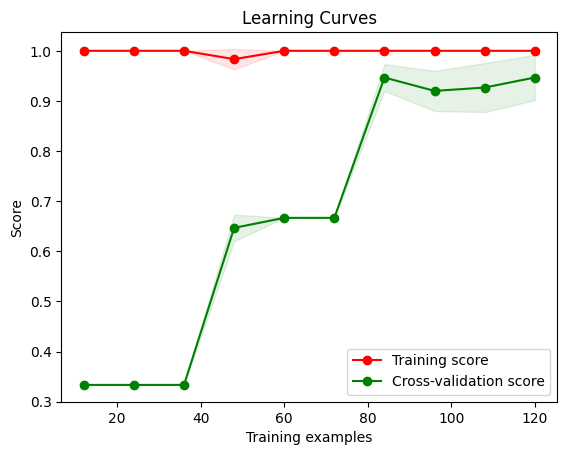

In [25]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

# データの読み込み
iris = load_iris()
X, y = iris.data, iris.target

# モデルの初期化
model = LGBMClassifier()

# 学習曲線を取得する関数
def plot_learning_curve(estimator, X, y):
    # 学習曲線を計算
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # 平均と標準偏差を計算
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 学習曲線のプロット
    plt.figure()
    plt.title('Learning Curves')
    plt.xlabel('Training examples')
    plt.ylabel('Score')

    # トレーニングスコアのプロット
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')

    # テストスコアのプロット
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')

    plt.legend(loc='best')
    plt.show()

# モデルの学習曲線をプロット
plot_learning_curve(model, X, y)

適応的学習率調整（Adaptive Learning Rate）は、機械学習アルゴリズムの訓練過程において使用される手法で、各重みパラメータの更新に用いる学習率を適応的に調整します。一般的な固定学習率のアルゴリズムに比べ、適応的に学習率を調整することにより、より効率的かつ効果的なモデルの訓練を可能にします。代表的な手法には、AdaGrad、RMSprop、Adamなどがあります。

LightGBMは勾配ブースティングアルゴリズムを用いたライブラリで、特に大量のデータや高速な訓練が必要な場合に向いています。LightGBM自体は適応的学習率を直接実装しているわけではありませんが、学習率をschedulerや外部の調整アルゴリズムと組み合わせて使用することができます。

**数式**:

インライン数式の例: $\theta_t = \theta_{t-1} - \eta_t \cdot \nabla L(\theta_{t-1})$

ブロック数式の例:

$$
\theta_t = \theta_{t-1} - \eta_t \cdot \nabla L(\theta_{t-1})
$$

ここで、$\theta_t$は時刻$t$におけるモデルのパラメータ、$\eta_t$は時刻$t$の学習率、$\nabla L(\theta_{t-1})$は損失関数の勾配です。

適応的学習率は、特定の状況において学習率を調整し、誤った方向に進むのを防ぎ、学習の収束を促進します。

In [26]:
# 適応的学習率調整の例を示すため、Adamオプティマイザーを使用した簡単なニューラルネットワークの例を示します。
import torch
import torch.nn as nn
import torch.optim as optim

# シンプルなニューラルネットワークモデルの定義
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        return self.linear(x)

model = SimpleModel().to(device)

# 損失関数と最適化方法（Adam）
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adamは適応的学習率を使用する

# ダミーデータの作成
inputs = torch.randn(10, 10).to(device)  # 入力: 10サンプル、各サンプル10次元
outputs = torch.randn(10, 1).to(device)  # 出力: 各サンプル1次元

# 学習率の調整の様子を観察するためのディクショナリ
learning_rates = []

# トレーニングループ
for epoch in range(5):  # 簡単な例なので5エポックだけ繰り返す
    optimizer.zero_grad()  # 勾配の初期化
    predictions = model(inputs)  # モデルの予測
    loss = criterion(predictions, outputs)  # 損失の計算
    loss.backward()  # 勾配の計算
    optimizer.step()  # パラメータの更新

    # 現在の学習率を取得して保存
    for param_group in optimizer.param_groups:
        current_lr = param_group['lr']
        learning_rates.append(current_lr)
        print(f'Epoch {epoch + 1}, Current Learning Rate: {current_lr}')  # 各epochの学習率を出力

# 学習率がどのように変化しているかを表示
print("Learning Rates over Epochs:", learning_rates)

Epoch 1, Current Learning Rate: 0.001
Epoch 2, Current Learning Rate: 0.001
Epoch 3, Current Learning Rate: 0.001
Epoch 4, Current Learning Rate: 0.001
Epoch 5, Current Learning Rate: 0.001
Learning Rates over Epochs: [0.001, 0.001, 0.001, 0.001, 0.001]


### 対数尤度の計算について

対数尤度（log-likelihood）は、統計モデルが観測データにどれだけ適合するかを表す指標です。尤度とは、与えられた観測データがモデルによって生成される確率を指し、対数尤度はその対数です。

#### 理論

尤度の最大化は、パラメータ推定に用いられる手法の一つで、これを最大尤度推定（MLE）と呼びます。尤度関数$L(\theta)$は観測データ$X$とパラメータ$\theta$に依存し、多くの場合対数尤度$\log L(\theta)$を最大化することでパラメータを推定します。以下のように表されます。

- インライン数式: $\log L(\theta) = \sum_{i=1}^n \log f(x_i | \theta)$
- ブロック数式:
  $$
  \log L(\theta) = \sum_{i=1}^n \log f(x_i | \theta)
  $$

ここで、$f(x_i | \theta)$は観測データ$x_i$がパラメータ$\theta$の下で発生する確率です。

#### LightGBMとの関係性

LightGBMは勾配ブースティング決定木（GBDT）を元にした高性能なアルゴリズムであり、二項分類問題や多項分類問題などで対数尤度が使用されます。特に分類問題では、ロジスティック回帰における対数尤度が交差エントロピーとして用いられ、コスト関数を最適化するために重要な役割を果たします。

#### 使用用途

対数尤度は以下のような用途があります。

- 統計モデルのパラメータ推定
- モデル選択（AICやBICの計算）
- 機械学習におけるコスト関数の最適化

これらは、モデルの複雑さやデータのフィットをバランス良く考慮するために利用されます。

In [27]:
# 対数尤度の計算をPythonで実装する例
import numpy as np

# 観測データ
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
print('観測データ:', x)

# モデルの平均 (mu) と標準偏差 (sigma)
mu = 3.0
sigma = 1.0
print('平均 (mu):', mu)
print('標準偏差 (sigma):', sigma)

# 正規分布における対数尤度関数を定義
# f(x_i | theta) は正規分布 N(mu, sigma^2) の確率密度関数

log_likelihood = -np.sum((x - mu)**2 / (2 * sigma**2) + np.log(sigma * np.sqrt(2 * np.pi)))
print('対数尤度:', log_likelihood)

# 対数尤度は与えられたデータがモデルにどれくらい適合するかを示す。
# この数値が大きいほどモデルはデータに適合していると考えられる。

観測データ: [1. 2. 3. 4. 5.]
平均 (mu): 3.0
標準偏差 (sigma): 1.0
対数尤度: -9.594692666023363


### 勾配ブースティング決定木 (GBDT) の基礎理論

勾配ブースティング決定木 (Gradient Boosting Decision Tree, GBDT) は、複数の決定木を組み合わせて高精度な予測を行うためのアンサンブル学習手法です。アンサンブル学習とは、複数のモデルを組み合わせて予測パフォーマンスを向上させる方法です。

#### 理論

GBDT の主要なアイデアは、基本の決定木を順次追加し、それぞれが前のモデルの誤差を修正するというものです。各ステップでの目的は、損失関数の負の勾配（最も急降下する方向）に従う方向で、予測誤差を減少させることです。

GBDT における損失関数 $L(y, F(x))$ は、$y$ が真の値、$F(x)$ が予測される関数（モデルの予測値）です。新しいモデル $h(x)$ を追加することで、この損失を最小化しようとします。数学的には以下のような更新を行います：

\[
F_{m+1}(x) = F_m(x) +
u h_m(x)
\]

ここで、$\nu$ は学習率です。学習率は小さくすることで、モデルの柔軟性を高め、過学習を防ぐのに役立ちます。

#### LightGBM との関係性

LightGBM は、GBDT を効率的に実装するためのツールです。LightGBM はデータの量が多い場合やカテゴリカルデータが多い場合に特に有効です。いくつかの工夫（例：リーフワイズツリー成長戦略、ヒストグラムベースのアルゴリズム）により、高速な学習と小さいメモリ消費を実現しています。

#### 使用用途

GBDT は分類問題や回帰問題に広く利用されています。特に、構造化データを扱う際や、非線形な関係を捉える必要があるタスクにおいて高いパフォーマンスを示します。

In [28]:
# GBDTの手作り実装 (簡易版)
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# 仮のデータセットを準備
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([5, 7, 9, 11, 13])  # 線形関係を持つデータ

# モデルのパラメータ設定
n_estimators = 3  # 木の数
learning_rate = 0.1  # 学習率

# 初期モデル（平均値）を考える
F0 = np.mean(y)
F_m = np.full(y.shape, F0)  # 初期予測
print("Initial model predictions:", F_m)

# 決定木のリストを用意
trees = []

# ブースティングを開始
for m in range(n_estimators):
    # 現在の負の勾配（= 残差）を計算
    residuals = y - F_m
    print(f"Residuals after iteration {m}:", residuals)

    # 決定木をトレイン
    tree = DecisionTreeRegressor(max_depth=2)
    tree.fit(X, residuals)
    trees.append(tree)

    # 新しい予測を作成
    F_m = F_m + learning_rate * tree.predict(X)
    print(f"Model predictions after iteration {m}:", F_m)

print("Final model predictions:", F_m)

# 各ステップにおける決定木と残差を基に予測が更新される。
# 実際のLightGBMではこれがかなり最適化され、効率的に計算される。

Initial model predictions: [9. 9. 9. 9. 9.]
Residuals after iteration 0: [-4. -2.  0.  2.  4.]
Model predictions after iteration 0: [8.6 8.8 9.  9.3 9.3]
Residuals after iteration 1: [-3.6 -1.8  0.   1.7  3.7]
Model predictions after iteration 1: [8.24  8.62  9.085 9.385 9.67 ]
Residuals after iteration 2: [-3.24  -1.62  -0.085  1.615  3.33 ]
Model predictions after iteration 2: [ 7.916    8.53475  8.99975  9.5465  10.003  ]
Final model predictions: [ 7.916    8.53475  8.99975  9.5465  10.003  ]


推論速度の最適化には、モデルサイズの縮小、特徴量の選択、木構造の調整などが含まれます。LightGBMは勾配ブースティングの一種で、木構造による予測を高速化するための様々な最適化技術を導入しています。例えば、リーフワイズのツリーニューグローストラテジーを使用することで、計算コストを削減し推論を高速化します。

数式上、一般的な木構造モデルの推論速度$S$は次のように表されます：

$S = O(	ext{depth} 	imes \log(	ext{leaves}))$

ここで、$depth$は木の深さ、$leaves$はリーフの数です。LightGBMではデータの特徴に応じた最適なツリー構造を選択するため、推論速度が最適化されます。

さらに、高速化には特徴量の数を減らす手法も含まれます。特徴量を削減することで、推論に必要な計算量が減少し、速度が向上します。LightGBMでは負の勾配方向を利用して効率的に特徴量を選択することで、推論速度の最適化を図っています。

推論速度の最適化は、大規模なデータセットをリアルタイムで処理する必要があるアプリケーションで特に重要であり、エッジデバイスやモバイル環境でもスムーズな動作を実現します。

In [ ]:
# LightGBMでモデルの推論速度を最適化する例
import lightgbm as lgb
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データセットを生成
X, y = make_classification(n_samples=10000, n_features=20, random_state=42)

# データセットを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBMのデータセットに変換
train_data = lgb.Dataset(X_train, label=y_train)

test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# ハイパーパラメータ
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',  # GBDTによるブースティング
    'num_leaves': 31,         # 高速化のためのリーフ数
    'learning_rate': 0.05,    # 学習率
    'verbose': -1
}

# モデルを訓練
model = lgb.train(params,
                  train_data,
                  valid_sets=[train_data, test_data],
                  num_boost_round=100,
                  early_stopping_rounds=10)

# モデルによる予測を実行
predictions = model.predict(X_test, num_iteration=model.best_iteration)

# 予測を二値化
binary_predictions = np.rint(predictions)

# 精度を評価
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Accuracy: {accuracy}')  # 精度の出力

# モデルの予測値を出力して確認
print('Predictions:', predictions)


LightGBMは勾配ブースティングに基づく決定木アルゴリズムで、特に高速な学習と高精度を両立することができる点が特徴です。一方で、クラスタリング手法はデータを非教師ありで分類する方法で、各データポイントを類似性に基づいてグループ分けします。クラスタリングとLightGBMを組み合わせることで、クラスタリングによりデータの特徴を捉えた後、その情報をLightGBMの学習に活用し、より効率的かつ精度の高い予測を行うことが可能になります。クラスタリングの結果を特徴量として追加することで、LightGBMの学習過程に新たな視点を与え、モデルの表現力を高めることができます。

例えば、まずクラスタリングを用いてデータをいくつかのクラスタに分割し、そのクラスタ情報を特徴量としてLightGBMモデルに組み込むことが考えられます。この方法により、データセットの内部構造をモデルが意識しながら学習することができます。

理論的には、クラスタリング結果をどのように特徴量として用いるかという点に工夫が必要です。例えば、クラスタ番号をそのまま特徴量にしたり、各クラスタ内の統計量（平均や分散など）を特徴量にすることが考えられます。

具体的にはk-meansクラスタリングを用いる場合、各データポイントがどのクラスタに所属するかという情報を追加の特徴量としてLightGBMに渡すことができます。このとき、データセット$ X $、ターゲット$ y $であるとすると、まず$ X $に対してクラスタリングを行い、結果のクラスタ番号を$ X_{cluster} $としてLightGBMに渡します。数式で表すと次のようになります:

$$ C = 	ext{kmeans}(X) $$

ここで$ C $はクラスタ番号のベクトルです。そしてLightGBMに渡すデータセットは次のようになります:

$$ X' = [X, C] $$

この手法により、データの潜在パターンを捉えた特徴を利用することができ、モデルの性能向上につながります。

In [30]:
# 必要なライブラリのインポート
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import lightgbm as lgb
import numpy as np

# データセットの生成: ランダムな分類問題を生成
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# KMeansクラスタリングの適用
kmeans = KMeans(n_clusters=5, random_state=42)
X_cluster = kmeans.fit_predict(X)

# クラスタリングの結果を確認
print("Cluster labels:", X_cluster)

# 元の特徴量にクラスタラベルを追加
X_with_cluster = np.hstack((X, X_cluster.reshape(-1, 1)))

# 追加された特徴量を確認
print("X with cluster labels (first 5 samples):\n", X_with_cluster[:5])

# LightGBM用のデータセットを作成
lgb_train = lgb.Dataset(X_with_cluster, label=y)

# LightGBMのハイパーパラメータを設定
params = {
    'objective': 'binary',  # 2クラス分類問題
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': 0
}

# モデルの学習
gbm = lgb.train(params, lgb_train, num_boost_round=100)

# モデルの学習完了
print("Model training completed.")

Cluster labels: [2 3 1 1 3 3 1 0 2 4 0 0 0 4 4 2 4 3 0 2 3 0 3 1 4 3 4 1 1 2 4 4 2 4 2 1 4
 4 3 4 1 4 1 0 3 2 3 3 1 0 1 4 0 3 4 1 0 0 2 4 0 0 4 4 3 2 0 2 4 3 4 3 2 4
 1 4 4 4 1 2 4 0 3 3 0 4 3 0 3 4 2 2 0 2 0 1 4 1 2 4 4 1 3 1 3 1 0 3 1 4 4
 2 2 1 0 3 0 4 3 1 3 2 3 0 0 2 2 4 2 4 4 2 3 0 3 1 3 1 2 2 0 1 4 4 0 2 0 4
 0 0 4 0 4 0 1 3 4 2 2 1 2 3 4 4 0 1 3 4 0 4 4 3 0 3 3 2 0 0 0 2 1 0 2 1 2
 4 2 0 3 2 1 4 1 0 3 2 3 2 0 1 3 0 4 1 2 4 4 2 1 1 2 3 2 1 1 2 2 3 0 1 2 3
 1 1 3 3 3 3 2 2 2 0 2 1 0 0 4 1 2 2 1 3 3 3 4 2 0 0 4 4 3 2 0 3 1 4 3 1 3
 1 3 3 0 4 1 1 2 3 0 4 3 3 0 0 0 3 1 3 1 0 0 1 3 1 4 2 0 4 3 1 1 2 0 3 4 3
 4 4 2 1 2 4 3 2 4 3 2 3 0 2 0 2 0 4 4 0 2 2 2 3 4 1 1 2 3 3 2 4 3 0 0 4 2
 2 2 2 0 4 4 1 3 1 3 3 1 2 1 2 4 3 4 2 0 1 1 0 1 4 0 0 0 0 2 1 0 3 2 0 1 2
 4 4 0 1 0 2 4 3 0 1 4 4 0 2 3 2 4 1 1 4 2 0 4 4 0 0 4 3 2 0 1 4 0 3 3 3 1
 1 2 1 3 4 4 3 0 0 1 2 0 2 4 4 1 3 3 1 0 3 1 0 1 1 4 3 4 2 4 2 0 4 3 3 4 2
 1 0 2 3 4 0 4 3 4 4 3 3 4 2 4 3 2 1 0 2 1 3 0 1 4 3 4 4 0 0 4 0 0 3 3 4 3
 4 4 2 4 